<a href="https://colab.research.google.com/github/kingy0ujin/2024-1-my-BDA/blob/main/inclass/05w_0402_tue_B_ch06_dataFrame_group_merge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 빅데이터분석프로그래밍

- 5주차 B반

In [ ]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [ ]:
import sys
import pandas as pd
import numpy as np
import seaborn as sns

print(sys.version)
print(pd.__version__)
print(np.__version__)
print(sns.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.5.3
1.25.2
0.13.1


In [ ]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 51.0 MB/s eta 0:00:00


In [ ]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

In [ ]:
# 데이터프레임의 소수점 이하 n(2)자리 출력 설정
pd.set_option('display.precision', 2)

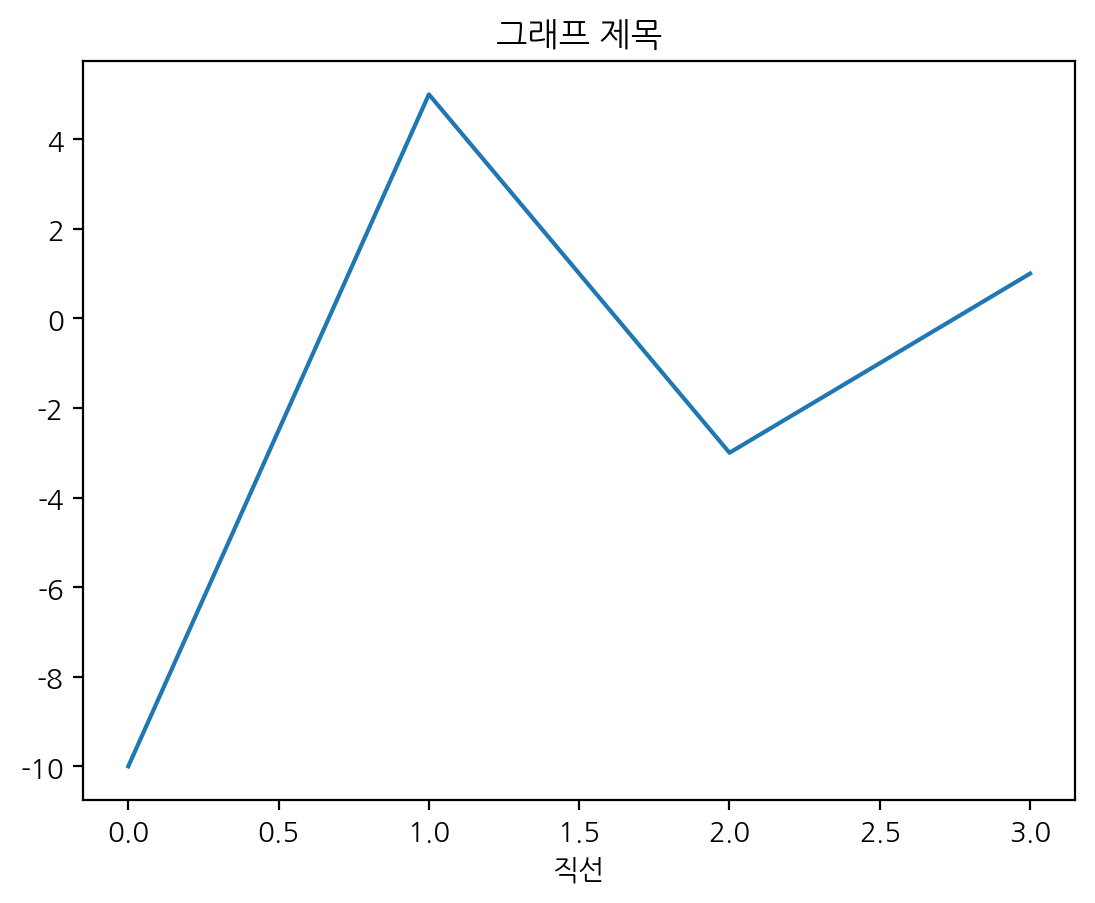

In [ ]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

## 집단별로 요약하기

### 전체 요약 통계량 구하기

In [ ]:
!git clone https://github.com/ai7dnn/data.git

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 5.98 MiB/s, done.


In [ ]:
import pandas as pd

exam = pd.read_csv('data/exam.csv')
exam.sample(frac=.2)

,id,nclass,math,english,science
0,1,1,50,98,50
14,15,4,75,56,78
17,18,5,80,78,90
8,9,3,20,98,15


In [ ]:
exam.agg('mean')

id         10.50
nclass      3.00
math       57.45
english    84.90
science    59.45
dtype: float64

In [ ]:
exam.agg(['mean', 'median'])  #agg -> 메소드

,id,nclass,math,english,science
mean,10.5,3.0,57.45,84.9,59.45
median,10.5,3.0,54.00,86.5,62.50


In [ ]:
# math 평균 구하기
exam.agg(mean_math = ('math', 'mean')) # 시험 예상!!!!!!!!!!!

,math
mean_math,57.45


In [ ]:
import numpy as np
df = pd.DataFrame([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9],
                   [np.nan, np.nan, 10]],
                   columns=['A', 'B', 'C'])
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [ ]:
df.agg(['sum', 'mean', 'median', 'min', 'max', 'count']) # nan은 없음

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [ ]:
df.agg(['sum', 'mean', 'median', 'min', 'max','count'], axis=0) #axis 안쓰는것과 같음

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0
median,4.0,5.0,7.5
min,1.0,2.0,3.0
max,7.0,8.0,10.0
count,3.0,3.0,4.0


In [ ]:
df.agg(['sum', 'mean', 'median', 'min', 'max','count'], axis=1) # 시험 예상!!!!, count가 1인 이유

,sum,mean,median,min,max,count
0,6.0,2.0,2.0,1.0,3.0,3.0
1,15.0,5.0,5.0,4.0,6.0,3.0
2,24.0,8.0,8.0,7.0,9.0,3.0
3,10.0,10.0,10.0,10.0,10.0,1.0


In [ ]:
df.agg({'A' : ['sum', 'min'], 'B' : ['min', 'max']}) # a열에는 sum, min만 구하기 때문에 NAN -> 딕셔너리

,A,B
sum,12.0,NaN
min,1.0,2.0
max,NaN,8.0


In [ ]:
df.agg(x=('A', 'max'), y=('B', 'min'), z=('C', 'mean')) # 인자 행명 = ("열명", "적용함수")

,A,B,C
x,7.0,NaN,NaN
y,NaN,2.0,NaN
z,NaN,NaN,7.0


In [ ]:
df

,A,B,C
0,1.0,2.0,3
1,4.0,5.0,6
2,7.0,8.0,9
3,NaN,NaN,10


In [ ]:
df.agg("mean") #시리즈로 나옴

A    4.0
B    5.0
C    7.0
dtype: float64

In [ ]:
df.agg("mean", axis=0) #시리즈로 나옴

A    4.0
B    5.0
C    7.0
dtype: float64

In [ ]:
df.agg("mean", axis='index') #시리즈로 나옴

A    4.0
B    5.0
C    7.0
dtype: float64

In [ ]:
df.agg("mean", axis=1) #시리즈로 나옴

0     2.0
1     5.0
2     8.0
3    10.0
dtype: float64

In [ ]:
df.agg("mean", axis='columns') #시리즈로 나옴

0     2.0
1     5.0
2     8.0
3    10.0
dtype: float64

In [ ]:
df.agg(["sum", "mean"], axis="columns")

,sum,mean
0,6.0,2.0
1,15.0,5.0
2,24.0,8.0
3,10.0,10.0


In [ ]:
df.agg(["sum", "mean"], axis="index")

,A,B,C
sum,12.0,15.0,28.0
mean,4.0,5.0,7.0


## 집단별 요약 통계량 구하기

In [ ]:
exam.head() # nclass -> 범주형 : 남, 여처럼 구분할 수 있는 것 --> 그룹화하기 쉬움

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [ ]:
exam.groupby('nclass').agg('mean')->  반으로 그룹화해서 모든 성적의 평균을 구해줘

,id,math,english,science
nclass,,,,
1,2.5,46.25,94.75,61.50
2,6.5,61.25,84.25,58.25
3,10.5,45.00,86.50,39.25
4,14.5,56.75,84.75,55.00
5,18.5,78.00,74.25,83.25


In [ ]:
exam.groupby('nclass').agg(['mean', 'max','min'])

id           math         english         science        
        mean max min   mean max min    mean max min    mean max min
nclass                                                             
1        2.5   4   1  46.25  60  30   94.75  98  86   61.50  78  50
2        6.5   8   5  61.25  90  25   84.25  90  78   58.25  98  25
3       10.5  12   9  45.00  65  20   86.50  98  65   39.25  65  15
4       14.5  16  13  56.75  75  46   84.75  98  56   55.00  78  12
5       18.5  20  17  78.00  89  65   74.25  83  68   83.25  98  58

In [ ]:
exam.groupby('nclass').agg('mean')[['math']]

,math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
exam.groupby('nclass').agg('mean')[['math','science','english']]

,math,science,english
nclass,,,
1,46.25,61.50,94.75
2,61.25,58.25,84.25
3,45.00,39.25,86.50
4,56.75,55.00,84.75
5,78.00,83.25,74.25


In [ ]:
exam.groupby('nclass').agg(mean_math = ('math', 'mean')) #mean_math -> 어떤걸 써도 상관 없음

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
exam.groupby('nclass').agg({"math":["mean"]})

,math
,mean
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [ ]:
exam.groupby('nclass').agg({"math":["mean","max","min"]})

math        
         mean max min
nclass               
1       46.25  60  30
2       61.25  90  25
3       45.00  65  20
4       56.75  75  46
5       78.00  89  65

## 2교시

### (알아 두면 좋아요) 변수를 인덱스로 바꾸지 않기

In [53]:
exam

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45


In [51]:
 # 시험 예상
 exam.groupby('nclass') \
    .agg(mean_math = ('math', 'mean'))

,mean_math
nclass,
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [52]:
 # 시험 예상
 exam.groupby('nclass', as_index = False) \
    .agg(mean_math = ('math', 'mean'))

,nclass,mean_math
0,1,46.25
1,2,61.25
2,3,45.00
3,4,56.75
4,5,78.00


### 여러 요약 통계량 한 번에 보내기

In [55]:
exam.groupby('nclass').agg(['mean', 'median']) # 멀티 컬럼

id          math        english        science       
        mean median   mean median    mean median    mean median
nclass                                                         
1        2.5    2.5  46.25   47.5   94.75   97.5   61.50   59.0
2        6.5    6.5  61.25   65.0   84.25   84.5   58.25   55.0
3       10.5   10.5  45.00   47.5   86.50   91.5   39.25   38.5
4       14.5   14.5  56.75   53.0   84.75   92.5   55.00   65.0
5       18.5   18.5  78.00   79.0   74.25   73.0   83.25   88.5

In [56]:
exam.groupby('nclass')[["math","english","science"]].agg(['mean', 'median'])

math        english        science       
         mean median    mean median    mean median
nclass                                            
1       46.25   47.5   94.75   97.5   61.50   59.0
2       61.25   65.0   84.25   84.5   58.25   55.0
3       45.00   47.5   86.50   91.5   39.25   38.5
4       56.75   53.0   84.75   92.5   55.00   65.0
5       78.00   79.0   74.25   73.0   83.25   88.5

In [57]:
exam.groupby('nclass').agg(['mean', 'median'])[["math","english","science"]]

math        english        science       
         mean median    mean median    mean median
nclass                                            
1       46.25   47.5   94.75   97.5   61.50   59.0
2       61.25   65.0   84.25   84.5   58.25   55.0
3       45.00   47.5   86.50   91.5   39.25   38.5
4       56.75   53.0   84.75   92.5   55.00   65.0
5       78.00   79.0   74.25   73.0   83.25   88.5

In [58]:
exam.groupby('nclass').count() # 모든 컬럼에 대한 카운트

,id,math,english,science
nclass,,,,
1,4,4,4,4
2,4,4,4,4
3,4,4,4,4
4,4,4,4,4
5,4,4,4,4


In [59]:
exam.groupby('nclass')[["id"]].count()

,id
nclass,
1,4
2,4
3,4
4,4
5,4


In [60]:
exam.groupby('nclass').count()[["id"]]

,id
nclass,
1,4
2,4
3,4
4,4
5,4


### 집단별로 다시 집단 나누기

In [61]:
import pandas as pd

mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [64]:
# 제조 회사(manufacturer) 및 구동 방식별(drv) 분리
# cty 평균 구하기

#시험 문제 형식
mpg.groupby(["manufacturer", "drv"]).agg(mean_cty = ('cty', 'mean'))
mpg.groupby(["manufacturer", "drv"]).mean()[["cty"]]
mpg.groupby(["manufacturer", "drv"])[["cty"]].mean()


<ipython-input-64-e828325bc804>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mpg.groupby(["manufacturer", "drv"]).mean()[["cty"]]


cty
manufacturer drv       
audi         4    16.82
             f    18.86
chevrolet    4    12.50
             f    18.80
             r    14.10
dodge        4    12.00
             f    15.82
ford         4    13.31
             r    14.75
honda        f    24.44
hyundai      f    18.64
jeep         4    13.50
land rover   4    11.50
lincoln      r    11.33
mercury      4    13.25
nissan       4    13.75
             f    20.00
pontiac      f    17.00
subaru       4    19.29
toyota       4    14.93
             f    21.37
volkswagen   f    20.93

In [66]:
mpg.groupby(["manufacturer","drv"]).agg(mean_cty=("cty","mean"))

mean_cty
manufacturer drv          
audi         4       16.82
             f       18.86
chevrolet    4       12.50
             f       18.80
             r       14.10
dodge        4       12.00
             f       15.82
ford         4       13.31
             r       14.75
honda        f       24.44
hyundai      f       18.64
jeep         4       13.50
land rover   4       11.50
lincoln      r       11.33
mercury      4       13.25
nissan       4       13.75
             f       20.00
pontiac      f       17.00
subaru       4       19.29
toyota       4       14.93
             f       21.37
volkswagen   f       20.93

In [71]:
# 추가 : 고속도로 평균 연비
mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean')).mean_hwy =('hwy','mean')

<ipython-input-71-8f8ca5902174>:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  mpg.groupby(['manufacturer', 'drv']).agg(mean_cty = ('cty', 'mean')).mean_hwy =('hwy','mean')


In [72]:
## chevrolet의 drv별 빈도

# chevrolet 추출
# drv별 분리
# 빈도 구하기
mpg.query('manufacturer == "audi"') \
   .groupby(['drv']).agg(n = ('drv', 'count'))

,n
drv,
4,11
f,7


In [73]:
mpg.query('manufacturer == "chevrolet"').groupby(['drv']).count()

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,category
drv,,,,,,,,,,
4,4,4,4,4,4,4,4,4,4,4
f,5,5,5,5,5,5,5,5,5,5
r,10,10,10,10,10,10,10,10,10,10


In [74]:
mpg.query('manufacturer == "chevrolet"').groupby(['drv']).agg(n = ('drv','count'))

,n
drv,
4,4
f,5
r,10


### (알아 두면 좋아요) value_counts()로 집단별 빈도 간단하게 구하기

In [75]:
mpg.groupby('drv').agg(n = ('drv', 'count'))

,n
drv,
4,103
f,106
r,25


In [78]:
mpg[['drv']].value_counts() # -> 시리즈로 나옴

drv
f      106
4      103
r       25
dtype: int64

In [80]:
mpg[['drv']].value_counts().to_frame() # -> 데이터 프레임으로 변환

,0
drv,
f,106
4,103
r,25


In [82]:
mpg[['drv', 'cyl']].value_counts()

drv  cyl
f    4      58
4    8      48
f    6      43
4    6      32
     4      23
r    8      21
f    5       4
r    6       4
f    8       1
dtype: int64

In [84]:
mpg[['drv', 'cyl']].value_counts().to_frame()

0
drv cyl    
f   4    58
4   8    48
f   6    43
4   6    32
    4    23
r   8    21
f   5     4
r   6     4
f   8     1

In [85]:
mpg['drv'].value_counts().to_frame().query('drv > 100')

,drv
f,106
4,103


### 함수 조합하기

In [86]:
# suv 추출
# 합산 연비 변수 만들기
# 제조 회사별로 분리
# 합산 연비 평균 구하기
# 내림차순 정렬
# 1~5위까지 출력, 시험 예상
mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False) \
   .head()

,mean_tot
manufacturer,
subaru,21.92
toyota,16.31
nissan,15.88
mercury,15.62
jeep,15.56


In [88]:
mpg.query('category == "suv"') \
   .assign(total = (mpg['hwy'] + mpg['cty']) / 2) \
   .groupby('manufacturer') \
   .agg(mean_tot = ('total', 'mean')) \
   .sort_values('mean_tot', ascending = False)

,mean_tot
manufacturer,
subaru,21.92
toyota,16.31
nissan,15.88
mercury,15.62
jeep,15.56
ford,15.33
chevrolet,14.89
lincoln,14.17
land rover,14.00


- p.166 혼자서 해보기

### 06-7 데이터 합치기

In [91]:
# 중간고사 데이터 만들기
test1 = pd.DataFrame({'id' : [1,2,3,4,5],
                      'midterm' : [60,80,70,90,85]})
# 기말고사 데이터 만들기
test2 = pd.DataFrame({'id'    : [1, 2, 3, 4, 5],
                      'final' : [70, 83, 65, 95, 80]})

In [92]:
test1

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [93]:
test2

,id,final
0,1,70
1,2,83
2,3,65
3,4,95
4,5,80


In [95]:
total = pd.merge(test1, test2) # 양쪽에 동일하게 있는 컬럼을 기준으로 합함
total

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


In [96]:
total = pd.merge(test1, test2, how='inner', on='id')
total

,id,midterm,final
0,1,60,70
1,2,80,83
2,3,70,65
3,4,90,95
4,5,85,80


### 다른 데이터를 활용해 변수 추가하기

In [97]:
name = pd.DataFrame({'nclass'  : [1, 2, 3, 4, 5],
                     'teacher' : ['kim', 'lee', 'park', 'choi', 'jung']})
name

,nclass,teacher
0,1,kim
1,2,lee
2,3,park
3,4,choi
4,5,jung


In [98]:
# nclass 기준으로 합쳐서 exam_new에 할당
exam_new = pd.merge(exam, name, how = 'left', on = 'nclass')
exam_new

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


In [100]:
exam_new = pd.merge(exam, name, how = 'left') # 여기선 left를 사용하나 inner를 사용하나 결과가 똑같음
exam_new

,id,nclass,math,english,science,teacher
0,1,1,50,98,50,kim
1,2,1,60,97,60,kim
2,3,1,45,86,78,kim
3,4,1,30,98,58,kim
4,5,2,25,80,65,lee
5,6,2,50,89,98,lee
6,7,2,80,90,45,lee
7,8,2,90,78,25,lee
8,9,3,20,98,15,park
9,10,3,50,98,45,park


### 세로로 합치기: concat()

In [101]:
# 학생 1~5번 시험 데이터 만들기
group_a = pd.DataFrame({'id'   : [1, 2, 3, 4, 5],
                        'test' : [60, 80, 70, 90, 85]})

# 학생 6~10번 시험 데이터 만들기
group_b = pd.DataFrame({'id'   : [6, 7, 8, 9, 10],
                        'test' : [70, 83, 65, 95, 80]})

In [103]:
group_a  # group_a 출력

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [104]:
group_b  # group_b 출력

,id,test
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [105]:
# 데이터 합쳐서 group_all에 할당 -> 위아래로 붙임
group_all = pd.concat([group_a, group_b])
group_all

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80


In [107]:
group_all.reset_index() #원 index가 열로 이동, 새로운 시퀀스 지정

,index,id,test
0,0,1,60
1,1,2,80
2,2,3,70
3,3,4,90
4,4,5,85
5,0,6,70
6,1,7,83
7,2,8,65
8,3,9,95
9,4,10,80


In [110]:
group_all.reset_index(drop=True) # 원 index 제거, 새로운 시퀀스 지정

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
5,6,70
6,7,83
7,8,65
8,9,95
9,10,80


### 심화학습(책에 없음) : 공식 메뉴얼 문서

In [111]:
df1 = pd.DataFrame({'lkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [1, 2, 3, 5]})
df2 = pd.DataFrame({'rkey': ['foo', 'bar', 'baz', 'foo'],
                    'value': [5, 6, 7, 8]})

In [112]:
df1

,lkey,value
0,foo,1
1,bar,2
2,baz,3
3,foo,5


In [113]:
df2

,rkey,value
0,foo,5
1,bar,6
2,baz,7
3,foo,8


In [116]:
# key 및 rkey 열에 df1과 df2를 병합, 공통 키가 다른 경우
# 값(value) 열에는 기본 접미사인 _x 및 _y가 추가
pd.merge(df1, df2, left_on='lkey', right_on='rkey')

,lkey,value_x,rkey,value_y
0,foo,1,foo,5
1,foo,1,foo,8
2,foo,5,foo,5
3,foo,5,foo,8
4,bar,2,bar,6
5,baz,3,baz,7


In [117]:
# 겹치는 열에 지정된 왼쪽 및 오른쪽 접미사를 추가하여 DataFrame df1, df2 병합
df1.merge(df2, left_on='lkey', right_on='rkey', suffixes=('_left','_right')

SyntaxError: incomplete input (<ipython-input-117-092dfb819d1a>, line 2)

## 정리하기 (p.176까지)
- 중간고사 -> 8장까지
- 기본 파이썬 문법 -> 16,17장도
- 과제 : 타이타닉 호, 공공데이터 활용, 3인까지, 공공데이터 대신 실시간 api 활용 가능, 주피터 노트북 실행 화면을 깃허브에 올려놓고 발표(13주차 예정)

In [118]:
# 추가한 변수를 pandas 코드에 바로 활용하기
exam.assign(total = exam['math'] + exam['english'] + exam['science']) \
.sort_values('total').head()

# 06. 각 집단별로 요약하기
exam.groupby('nclass').agg(mean_math = ('math','mean'))

# 각 집단별로 다시 집단 나누기
mpg.groupby(['manufacturer','drv']).agg(mean_cty = ('cty', 'mean'))

# 07.데이터 합치기
pd.merge(test1, test2, how='left', on = 'id')
pd.concat([group_a, group_b])

,id,test
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
0,6,70
1,7,83
2,8,65
3,9,95
4,10,80
